In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.min_rows', 20)
pd.set_option('display.max_rows', 20)

In [2]:
root = r"C:\Users\eupho\OneDrive\Documents\perso\projets\classification_texte_bapteme_philo"
corpus = pd.read_parquet(root + "\data.parquet", engine="fastparquet")
corpus["id"] = list(range(len(corpus)))
corpus = corpus.sort_values("id")
corpus

,id,message,message_preprocessed,category,length
index,,,,,
0,0,Nous avons vu [quoi est Di...,vu quoi dieuhttpsparlafoif...,philosophy,463
1,1,Peut-il faire que les chos...,peut-il faire chose passée...,philosophy,30
2,2,Peut-il faire les choses q...,peut-il faire chose fait o...,philosophy,48
3,3,## Article 1 : Y-a-t-il en...,article y-a-t-il dieu puis...,philosophy,31
4,4,> On dit dans le psaume 89...,dit psaume « puissant seig...,philosophy,73
5,5,Le fait même qu’on se pose...,fait pose question si dieu...,philosophy,283
6,6,Dans le vocabulaire aristo...,vocabulaire aristotélicien...,philosophy,229
7,7,Puissance passive : « Prin...,puissance passive « princi...,philosophy,139
8,8,Puissance active : « Princ...,puissance active « princip...,philosophy,97


In [3]:
corpus.index = corpus["id"]

In [4]:
corpus.index.duplicated().any()

False

(0.0, 600.0)

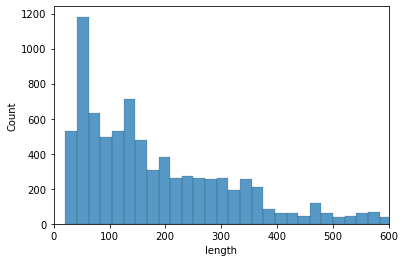

In [6]:
sb.histplot(data=corpus, x="length")
plt.xlim(0, 600)

In [7]:
X = corpus["message_preprocessed"]
y = corpus["category"]
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X)

# transform a count matrix to a normalized tf-idf representation (tf-idf transformer)
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

# Reduction de dimensions pour potentiellement observer des clusters

In [8]:
print("number of dimensions at the beginninig =", X_tfidf.shape)

number of dimensions at the beginninig = (8228, 12948)


In [9]:
# TruncatedSVD
# Pas de PCA car ne prend pas de matrices creuses en entrees
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
svd.fit(X_tfidf)

TruncatedSVD(n_components=50, n_iter=7, random_state=42)

In [10]:
print(svd)

TruncatedSVD(n_components=50, n_iter=7, random_state=42)


In [ ]:
print(svd.explained_variance_ratio_)

print(svd.explained_variance_ratio_.sum() * 100)

print(svd.singular_values_)

[0.02214179 0.02849172 0.01337039 0.01472054 0.01406414]
9.278857572530454
[17.82470254 15.31355658 11.66363714 10.88479701 10.72144658]


In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, verbose=1)
tsne_results = tsne.fit_transform(X_tfidf)
X_embedded.shape

(8228, 2)

In [12]:
X_embedded

array([[ 39.4088  , -61.04797 ],
       [ 22.06879 ,  80.641975],
       [-62.679115, -73.773834],
       ...,
       [-87.22605 ,  -7.495763],
       [ 45.337307,  34.439053],
       [-64.01233 ,  27.169582]], dtype=float32)

In [49]:
# clustering
# 1. K means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(X_tfidf)
